In [2]:
#importing the necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#creating a dataframe
DF=pd.DataFrame(pd.read_excel(r'/home/vedanshi/Documents/DSML/Data Science/Minor Project/Minor Project Data set (Stock Price Prediction).xlsx'))
DF

/tmp/ipykernel_19737/1951708135.py:3: DeprecationWarning:


Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        



,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


### Finding the summaries of data and filling the missing values if any and seeing the size of the data 👇.

In [3]:
print(pd.DataFrame(DF.info()))
print(pd.DataFrame(DF.describe()))
print('\n size of the data :',DF.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB
Empty DataFrame
Columns: []
Index: []
                                Date         Open         High          Low  \
count                           1009  1009.000000  1009.000000  1009.000000   
mean   2020-02-05 07:30:58.870168320   419.059673   425.320703   412.374044   
min              2018-02-05 00:00:00   233.919998   250.649994   231.229996   
25%              2019-02-06 00:00:00   331.4899

In [4]:
DF.isna().sum() #luckily no missing values.

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

printint some charts for seeing the outliers 👇

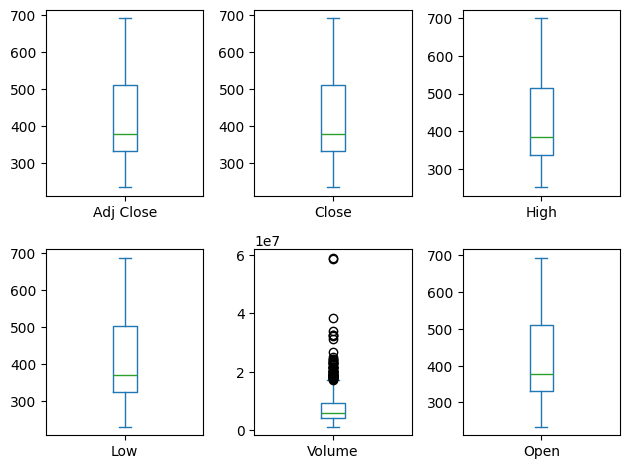

In [5]:
#box plot for Adj Close
plt.subplot(2,3,1)
DF['Adj Close'].plot(kind='box')

# box plot for cloes
plt.subplot(2,3,2)
DF['Close'].plot(kind='box')

# box plot for high
plt.subplot(2,3,3)
DF['High'].plot(kind='box')

# box plot for low
plt.subplot(2,3,4)
DF['Low'].plot(kind='box')

# box plot for volume
plt.subplot(2,3,5)
DF['Volume'].plot(kind='box')

#box plot for open
plt.subplot(2,3,6)
DF['Open'].plot(kind='box')

plt.tight_layout()
plt.show()


Only volume has outliers. We need to rectify it 👇

In [6]:
Q1,Q3=DF['Volume'].quantile([.25,.75])
IQR=Q3-Q1
low=Q1-(1.5* IQR) 
high=Q3+(1.5* IQR)
DF.loc[DF['Volume']>high,'Volume']=high
#we do not use low here since there are no outliers beneath the lowest value for volume. 

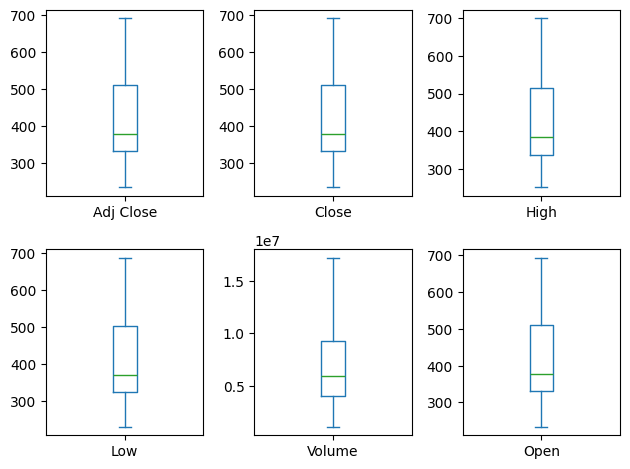

In [7]:
#box plot for Adj Close
plt.subplot(2,3,1)
DF['Adj Close'].plot(kind='box')

# box plot for cloes
plt.subplot(2,3,2)
DF['Close'].plot(kind='box')

# box plot for high
plt.subplot(2,3,3)
DF['High'].plot(kind='box')

# box plot for low
plt.subplot(2,3,4)
DF['Low'].plot(kind='box')

# box plot for volume
plt.subplot(2,3,5)
DF['Volume'].plot(kind='box')

#box plot for open
plt.subplot(2,3,6)
DF['Open'].plot(kind='box')

plt.tight_layout()
plt.show()

#plotting the same plots again to see the desired removal of outliers 

#### All the  outliers cleared, we now procede to data under standing.

# Background before data understanding.
- Open Price:

        The opening price is the price of a stock at the beginning of a trading session.

        Analysts may use the open price to assess the initial market sentiment or identify potential gaps between the previous close and the current open.

- close Price:

        The closing price is the last traded price of a stock during a trading session.

        It is often used to calculate daily returns and assess the overall performance of a stock over a specific period.

- High and Low Prices:

        High and low prices represent the highest and lowest prices reached during a trading session.

        Technical analysts use these values to identify support and resistance levels, trends, and potential breakouts or breakdowns.

- Adjusted Close Price:

        The adjusted close price accounts for corporate actions such as dividends, stock splits, or other adjustments.

        This is crucial for accurate historical price comparisons and calculations, especially over long periods.

- Volume:

        Volume represents the total number of shares traded during a given period.

        High trading volume can indicate increased interest or momentum, while low volume might suggest weak investor interest.
        
        Volume analysis is often used in conjunction with price movements to confirm or question the strength of a trend.

- ***We have to predict the closing value of stock to predict it's future***



In [8]:
DF

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,17168150
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,17168150
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


# Data Understanding and instructons to be performed on the data.

1. Is the data of a particular stock or whole market?
2. We will have to group the data by date, if the prices given are of different days.
3. We will have to see the relationships between attributes such as date, open, high and low, adjusted close.
4. How is adj close affecting the close price ?
5. Are open, high and low affecting adj close in anyway?
6. does the above mentioned parameters affect the close price?

1. ***The data gvien is of the enitre market as no paritcualr ticker is mentioned with column.***

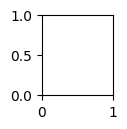

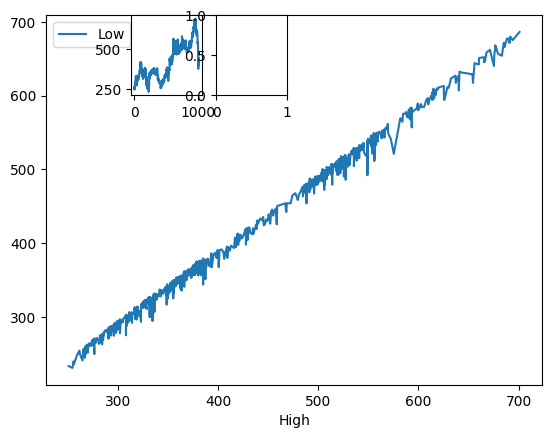

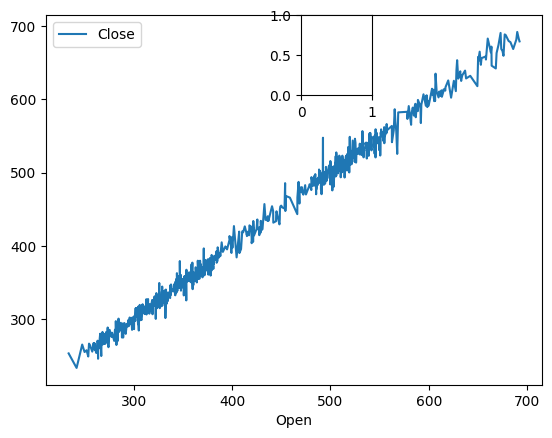

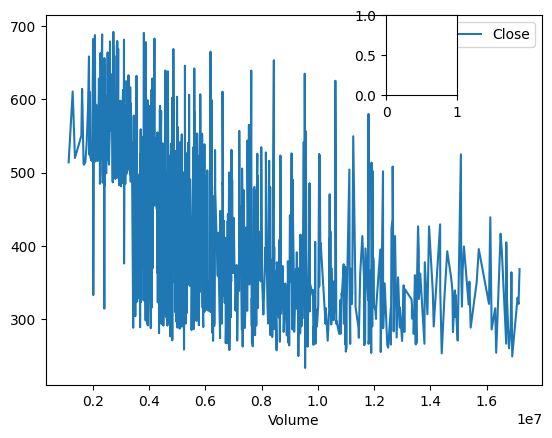

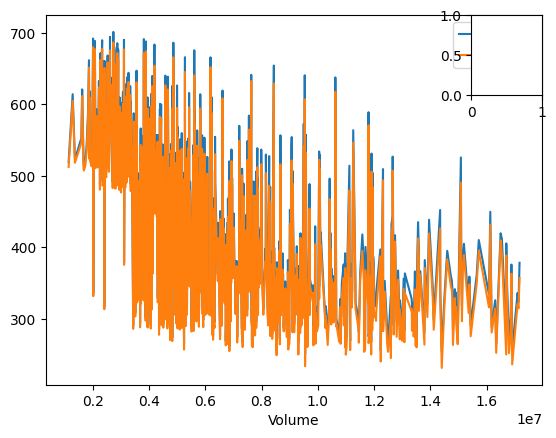

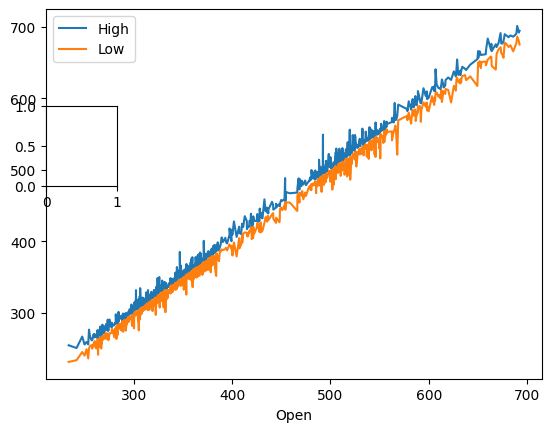

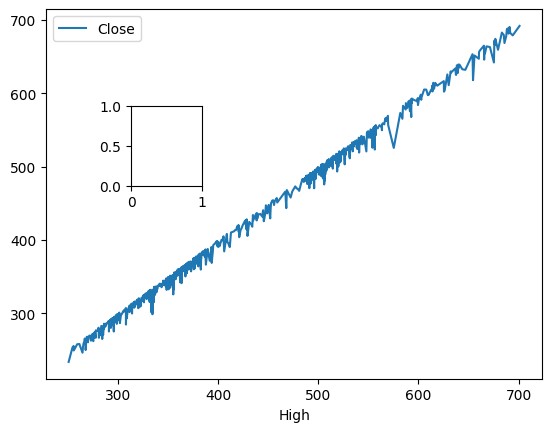

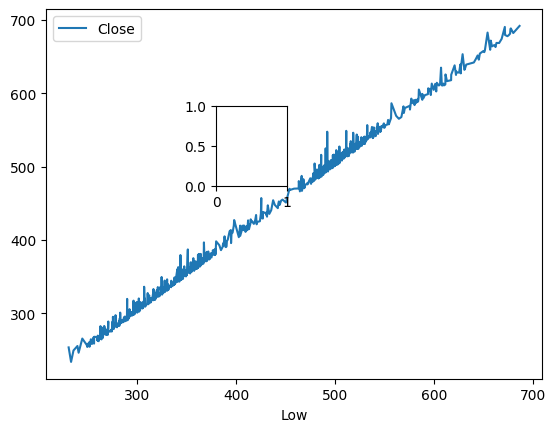

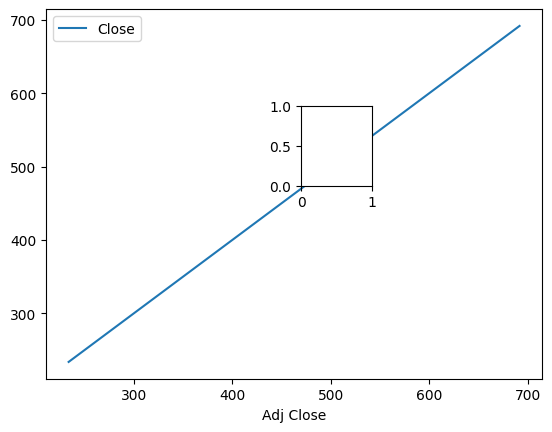

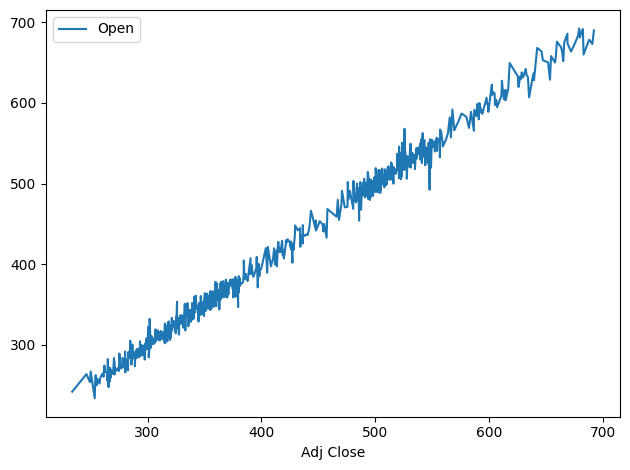

In [9]:
#.groupby('x-axis')[['wanted graphs']]
plt.subplot(4,6,1)
DF.groupby('High')[['Low']].mean().plot()
plt.subplot(4,6,2)
plt.plot(DF['Open'])
plt.subplot(4,6,3)
DF.groupby('Open')[['Close']].mean().plot()
plt.subplot(4,6,4)
DF.groupby('Volume')[['Close']].mean().plot()
plt.subplot(4,6,5)
DF.groupby('Volume')[['High','Low']].mean().plot()
plt.subplot(4,6,6)
DF.groupby('Open')[['High','Low']].mean().plot()
plt.subplot(4,6,7)
DF.groupby('High')[['Close']].mean().plot()
plt.subplot(4,6,8)
DF.groupby('Low')[['Close']].mean().plot()
plt.subplot(4,6,9)
DF.groupby('Adj Close')[['Close']].mean().plot()
plt.subplot(4,6,10)
DF.groupby('Adj Close')[['Open']].mean().plot()
plt.tight_layout()
plt.show()

In [10]:
DF['Diff']=DF['High']-DF['Low']
DF

,Date,Open,High,Low,Close,Adj Close,Volume,Diff
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,17.869995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,21.700012
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,8.120025
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,17.619995
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,19.690002
...,...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,17168150,29.500000
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,17168150,32.940002
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,25.500000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,24.980011


<Axes: >

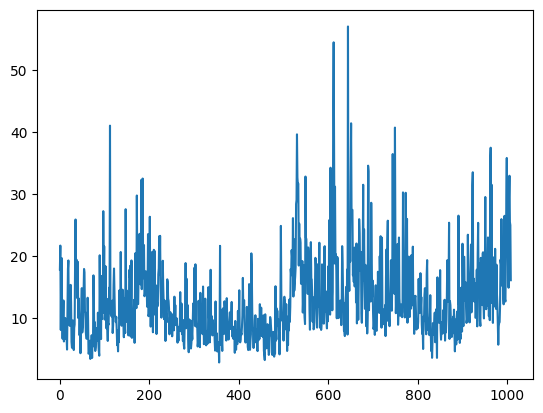

In [11]:
DF['Diff'].plot()

<Axes: xlabel='Diff'>

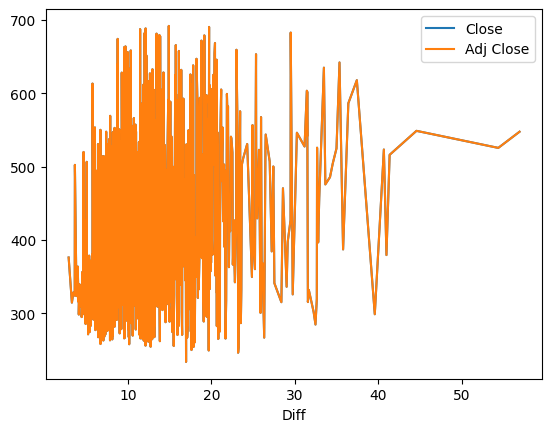

In [12]:
DF.groupby('Diff')[['Close','Adj Close']].mean().plot()

<function matplotlib.pyplot.show(close=None, block=None)>

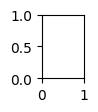

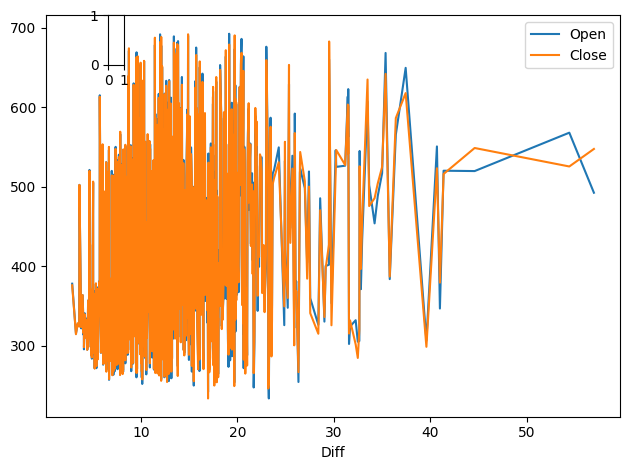

In [13]:
plt.subplot(5,10,1)
DF.groupby('Diff')[['Open','Close']].mean().plot()
plt.subplot(5,10,2)
DF.groupby('Diff')[['High','Low']]
plt.tight_layout()
plt.show

<Axes: xlabel='Date'>

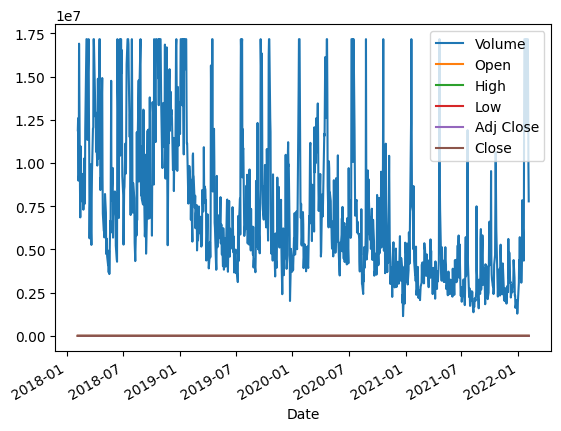

In [14]:
DF.groupby('Date')[['Volume','Open','High','Low','Adj Close','Close']].mean().plot()

<Axes: xlabel='Date'>

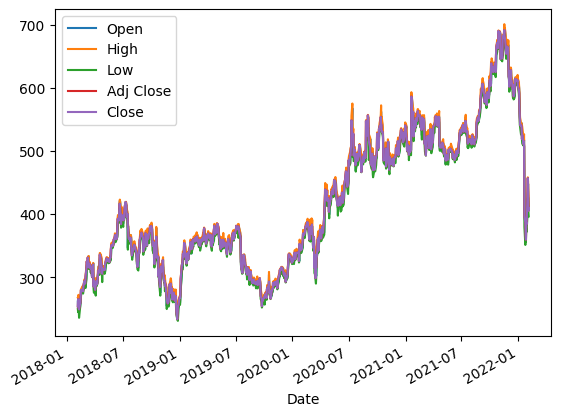

In [15]:
DF.groupby('Date')[['Open','High','Low','Adj Close','Close']].mean().plot()

<Axes: xlabel='Date'>

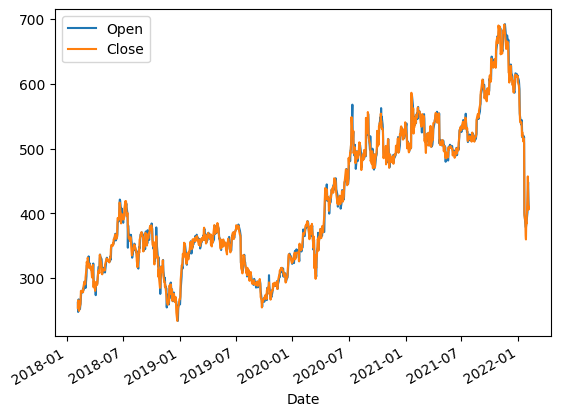

In [16]:
DF.groupby('Date')[['Open','Close']].mean().plot()

<Axes: xlabel='Close'>

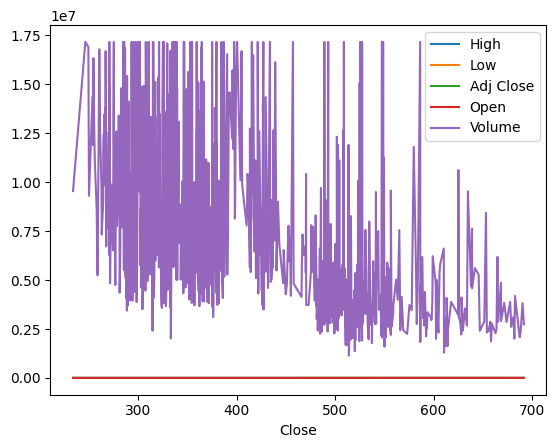

In [17]:
DF.groupby('Close')[['High','Low','Adj Close','Open','Volume']].mean().plot()

<Axes: xlabel='Close'>

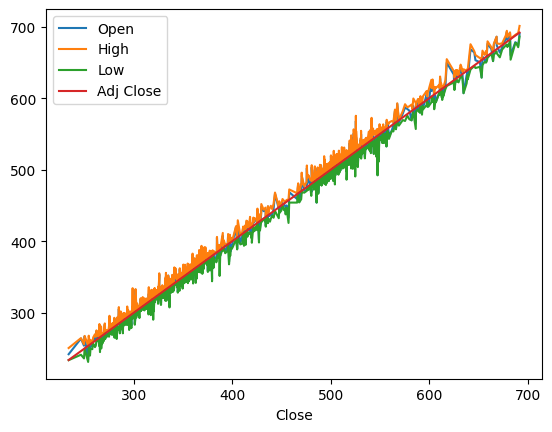

In [18]:
DF.groupby('Close')[['Open','High','Low','Adj Close']].mean().plot()

<Axes: xlabel='Open'>

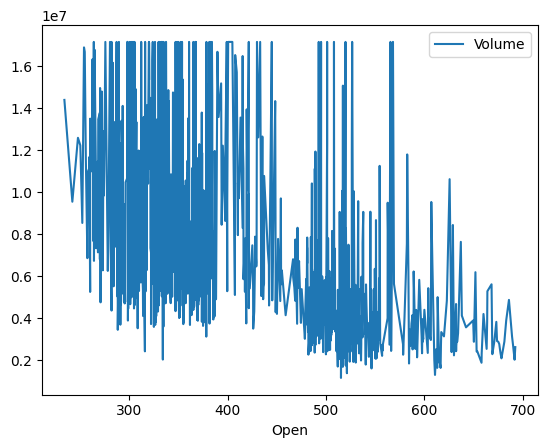

In [19]:
DF.groupby('Open')[['Volume']].mean().plot()

In [20]:
import plotly.graph_objects as go
import plotly.offline as po
from datetime import datetime
#fig=go.Figure(data=[go.Candlestick(x=DF.index, open=DF['Open'].values, high=DF['High'].values, low=DF['Low'].values, close=DF['Close'].values)])
fig=go.Figure(data=[go.Candlestick(x=DF['Date'], open=DF['Open'], high=DF['High'], low=DF['Low'], close=DF['Close'])])
po.iplot(fig,filename='candel stick plot')

## From above plots we conculde a few things that answer some of the questiond asked above and raises some new ones
- High and low are not directly related to one another but are realted to volume and are showing high corelation to it and are not lniearly dependent on it.
- Adj close and close are directly related via a linear curve.
- Everyday the variables other than date folloe the same trend, why  is that so ?
adj close and close have valid reson as they are linearly dependent on one anotehr, but why is open follwing the trend so closely ?
- As soon as volume is added to the ***plt.subplot(4,6,9)
DF.groupby('Adj Close')[['Close']].mean().plot()*** the plot drastically changes or any other plot for that matter.
- The same thing happens when close price is visualized with all the other columns inculding volume, the trend changes if it's visulaized without volume and it changrs if it's just visulaized with cloes price.
- There is a sharp dip for the first few months of every year, except 2021 

## decoding the date column of the data.

In [21]:
DF['Date']=pd.to_datetime(DF['Date']) 
DF['Day']=DF['Date'].dt.day
DF['Month']= DF['Date'].dt.month
DF['Year']=DF['Date'].dt.year
DF.drop('Date',axis=1,inplace=True)
DF

,Open,High,Low,Close,Adj Close,Volume,Diff,Day,Month,Year
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,17.869995,5,2,2018
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,21.700012,6,2,2018
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,8.120025,7,2,2018
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,17.619995,8,2,2018
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,19.690002,9,2,2018
...,...,...,...,...,...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,427.140015,17168150,29.500000,31,1,2022
1005,432.959991,458.480011,425.540009,457.130005,457.130005,17168150,32.940002,1,2,2022
1006,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,25.500000,2,2,2022
1007,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,24.980011,3,2,2022


## appending the target to the end of the dataset.

In [22]:
DF

,Open,High,Low,Close,Adj Close,Volume,Diff,Day,Month,Year
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,17.869995,5,2,2018
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,21.700012,6,2,2018
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,8.120025,7,2,2018
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,17.619995,8,2,2018
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,19.690002,9,2,2018
...,...,...,...,...,...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,427.140015,17168150,29.500000,31,1,2022
1005,432.959991,458.480011,425.540009,457.130005,457.130005,17168150,32.940002,1,2,2022
1006,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,25.500000,2,2,2022
1007,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,24.980011,3,2,2022


In [23]:
temp_col=DF.columns.to_list()
new_col=temp_col[:3]+temp_col[4:]
new_col.append(temp_col[3])
DF=DF.reindex(columns=new_col)
DF

,Open,High,Low,Adj Close,Volume,Diff,Day,Month,Year,Close
0,262.000000,267.899994,250.029999,254.259995,11896100,17.869995,5,2,2018,254.259995
1,247.699997,266.700012,245.000000,265.720001,12595800,21.700012,6,2,2018,265.720001
2,266.579987,272.450012,264.329987,264.559998,8981500,8.120025,7,2,2018,264.559998
3,267.079987,267.619995,250.000000,250.100006,9306700,17.619995,8,2,2018,250.100006
4,253.850006,255.800003,236.110001,249.470001,16906900,19.690002,9,2,2018,249.470001
...,...,...,...,...,...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,17168150,29.500000,31,1,2022,427.140015
1005,432.959991,458.480011,425.540009,457.130005,17168150,32.940002,1,2,2022,457.130005
1006,448.250000,451.980011,426.480011,429.480011,14346000,25.500000,2,2,2022,429.480011
1007,421.440002,429.260010,404.279999,405.600006,9905200,24.980011,3,2,2022,405.600006


## Splitting the datset in to training and testing sets.

In [24]:
from sklearn.model_selection import train_test_split as tts
x=DF.iloc[:,:-1]
y=DF.iloc[:,-1]
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.1,random_state=70)
print(x_test.shape,x_train.shape)

(101, 9) (908, 9)


# Making the ML model

In [25]:
from sklearn.linear_model import LinearRegression as lp
model=lp()
predictor=model.fit(x_train,y_train) # the linear model.

## Defening some matrices to judge the model.

In [26]:
from sklearn.metrics import mean_squared_error, r2_score #mean arithmatic percentage error = mape. 
def metrics(y_true,y_pred):
    print(f'RMSE: ',mean_squared_error(y_true,y_pred)**0.5)
    print(f'R_sqrd vlaue: ', r2_score(y_true,y_pred))
def accuracy(y_true,y_pred):
    error=abs(y_true-y_pred)
    mape=100*np.mean(error/y_true)
    accuracy=100-mape
    return accuracy

In [27]:
y_pred=predictor.predict(x_test)

In [28]:
metrics(y_test,y_pred)

RMSE:  1.8066449257752947e-13
R_sqrd vlaue:  1.0


In [29]:
accuracy(y_test,y_pred)

99.99999999999996

# Testing the above model on a different dataset.

In [30]:
test_data=pd.read_csv(r'/home/vedanshi/Downloads/AAU.csv')
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-12-20,1.62,1.64,1.60,1.63,1.63,14100
1,2005-12-21,1.63,1.79,1.62,1.67,1.67,46500
2,2005-12-22,1.70,1.81,1.70,1.74,1.74,63200
3,2005-12-23,1.79,2.15,1.79,2.00,2.00,130400
4,2005-12-27,2.00,2.27,2.00,2.24,2.24,95500
...,...,...,...,...,...,...,...
3589,2020-03-26,0.33,0.33,0.27,0.28,0.28,613000
3590,2020-03-27,0.28,0.33,0.28,0.30,0.30,202000
3591,2020-03-30,0.31,0.32,0.28,0.28,0.28,445900
3592,2020-03-31,0.28,0.29,0.28,0.28,0.28,216000


In [31]:
test_data['Diff']=test_data['High']-test_data['Low']
test_data

,Date,Open,High,Low,Close,Adj Close,Volume,Diff
0,2005-12-20,1.62,1.64,1.60,1.63,1.63,14100,0.04
1,2005-12-21,1.63,1.79,1.62,1.67,1.67,46500,0.17
2,2005-12-22,1.70,1.81,1.70,1.74,1.74,63200,0.11
3,2005-12-23,1.79,2.15,1.79,2.00,2.00,130400,0.36
4,2005-12-27,2.00,2.27,2.00,2.24,2.24,95500,0.27
...,...,...,...,...,...,...,...,...
3589,2020-03-26,0.33,0.33,0.27,0.28,0.28,613000,0.06
3590,2020-03-27,0.28,0.33,0.28,0.30,0.30,202000,0.05
3591,2020-03-30,0.31,0.32,0.28,0.28,0.28,445900,0.04
3592,2020-03-31,0.28,0.29,0.28,0.28,0.28,216000,0.01


In [32]:
#configuring the test data as per the original dataset.
test_data['Date']=pd.to_datetime(test_data['Date']) 
test_data['Day']=test_data['Date'].dt.day
test_data['Month']= test_data['Date'].dt.month
test_data['Year']=test_data['Date'].dt.year
test_data.drop('Date',axis=1,inplace=True)
test_data
#amending the columns as per the previous dataset.
temp_col=test_data.columns.to_list()
new_col=temp_col[:3]+temp_col[4:]
new_col.append(temp_col[3])
test_data=test_data.reindex(columns=new_col)
test_data

,Open,High,Low,Adj Close,Volume,Diff,Day,Month,Year,Close
0,1.62,1.64,1.60,1.63,14100,0.04,20,12,2005,1.63
1,1.63,1.79,1.62,1.67,46500,0.17,21,12,2005,1.67
2,1.70,1.81,1.70,1.74,63200,0.11,22,12,2005,1.74
3,1.79,2.15,1.79,2.00,130400,0.36,23,12,2005,2.00
4,2.00,2.27,2.00,2.24,95500,0.27,27,12,2005,2.24
...,...,...,...,...,...,...,...,...,...,...
3589,0.33,0.33,0.27,0.28,613000,0.06,26,3,2020,0.28
3590,0.28,0.33,0.28,0.30,202000,0.05,27,3,2020,0.30
3591,0.31,0.32,0.28,0.28,445900,0.04,30,3,2020,0.28
3592,0.28,0.29,0.28,0.28,216000,0.01,31,3,2020,0.28


In [33]:
x2=test_data.iloc[:,:-1]
y2=test_data.iloc[:,-1]
x2_train,x2_test,y2_train,y2_test=tts(x2,y2,test_size=0.1,random_state=70)
print(x2_test.shape,x2_train.shape)

(360, 9) (3234, 9)


In [34]:
y2_pred=predictor.predict(x2_test)

In [35]:
metrics(y2_test,y2_pred)

RMSE:  9.699919181448242e-13
R_sqrd vlaue:  1.0


In [36]:
accuracy(y2_test,y2_pred)

99.99999999991196

the linear model is somehow giving 99% accuracy i still do not understand that.